In [3]:
import matplotlib.pyplot as plt
import numpy as np
from control.matlab import tf, feedback, step, bode, logspace, mag2db

In [4]:
"""
後で使う関数の定義
"""

def linestyle_generator():
    """グラフをプロットするときの線種を決めるジェネレータ"""
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    """グラフを整える"""
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    """ボード線図を整える"""
    # ゲイン線図
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    # 位相線図
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('omega [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')

    # 凡例
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

In [5]:
"""
垂直駆動アームのモデル
"""

g = 9.81
l = 0.2
M = 0.5
mu = 1.5e-2
J = 1.0e-2

P = tf([0, 1], [J, mu, M*g*l])

ref = 30 # 目標角度

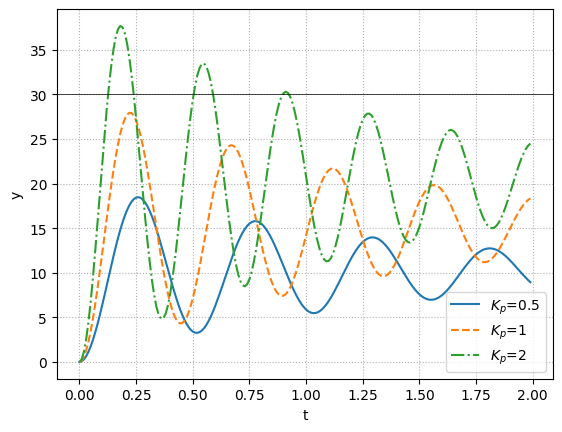

In [6]:
Kps = [0.5, 1, 2] # 比例ゲイン

LS = linestyle_generator()
fig, ax = plt.subplots()

for Kp in Kps:
    K = tf([0, Kp], [0, 1]) # 比例制御
    Gyr = feedback(P*K, 1) # 閉ループ系
    y, t = step(Gyr, np.arange(0, 2, 0.01))

    pltargs = {'ls': next(LS), 'label': '$K_p$='+str(Kp)}
    ax.plot(t, y * ref, **pltargs)

ax.axhline(ref, color="k", linewidth=0.5)
plot_set(ax, 't', 'y', 'best')

c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


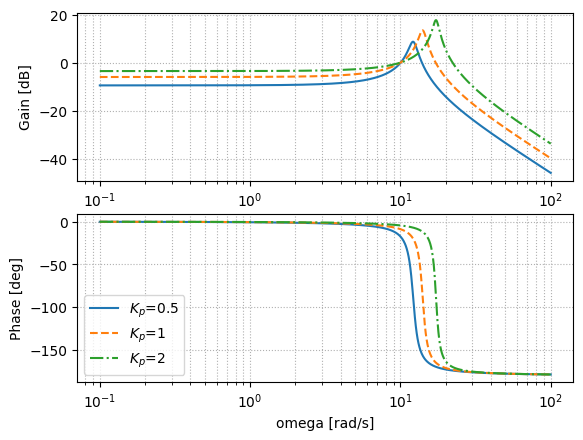

In [8]:
Kps = [0.5, 1, 2] # 比例ゲイン

LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)

for Kp in Kps:
    K = tf([0, Kp], [0, 1]) # 比例制御
    Gyr = feedback(P*K, 1) # 閉ループ系
    mag, phase, w = bode(Gyr, logspace(-1, 2, 1000), plot=False)

    pltargs = {'ls': next(LS), 'label': '$K_p$='+str(Kp)}
    ax[0].semilogx(w, mag2db(mag), **pltargs)
    ax[1].semilogx(w, np.rad2deg(phase), **pltargs)

bodeplot_set(ax, 'lower left')